# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
pd.set_option('display.max_colwidth', None)

import seaborn as sns
sns.set_style('whitegrid')

# Importing the Data

In [2]:
df = pd.read_csv('datasets/bestsellers with categories.csv')

# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


There are no missing data in the dataset, which is great for us! let's go to the next step.

In [4]:
df['Author'].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

Some of the authors' names have been misspelled so we have to correct them first.

In [5]:
mask = df['Author'] == "J. K. Rowling"
df.loc[mask, 'Author'] = "J.K. Rowling"

mask = df['Author'] == "George R. R. Martin"
df.loc[mask, 'Author'] = "George R.R. Martin"

***

# Exploratory Data Analysis

Let's start with listing out the top 10 books by user rating and the number of reviews

In [6]:
df.sort_values(by=['User Rating', 'Reviews'], ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
153,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,4.9,19576,8,2011,Non Fiction


As we can see from the table above, the list consists of __duplicate__ records of books. At the same time, there are many books were chosen as the bestsellers for __more than one__ year. Therefore, we'll find the names of the top 10 books without duplicate.

In [7]:
df.drop_duplicates(subset=['Name']).sort_values(by=['User Rating', 'Reviews'], ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
153,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,4.9,19576,8,2011,Non Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Dav Pilkey,4.9,12619,8,2019,Fiction
207,"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",Jill Twiss,4.9,11881,13,2018,Fiction
157,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",J.K. Rowling,4.9,10052,22,2016,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction


Let's find out that the proportion of books whose Genre is Fiction and Non-Fiction.

Text(0.5, 1.0, 'Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)')

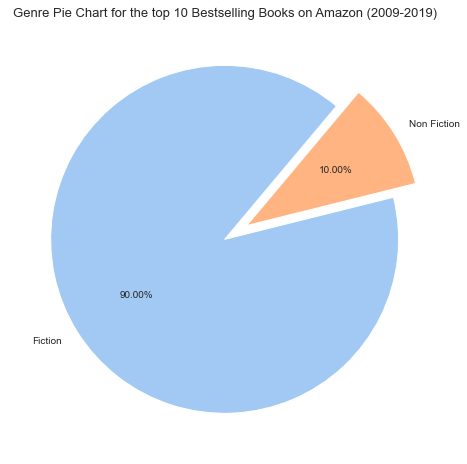

In [8]:
pie_1 = df.drop_duplicates(subset=['Name']).sort_values(by=['Reviews'], ascending=False)['Genre'].head(10).value_counts()

sns.set_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(pie_1, explode=[0, 0.15], labels=['Fiction','Non Fiction'], autopct='%.2f%%', startangle=50)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)', fontdict={'size' : 13})

The distribution plot for the price of the books:

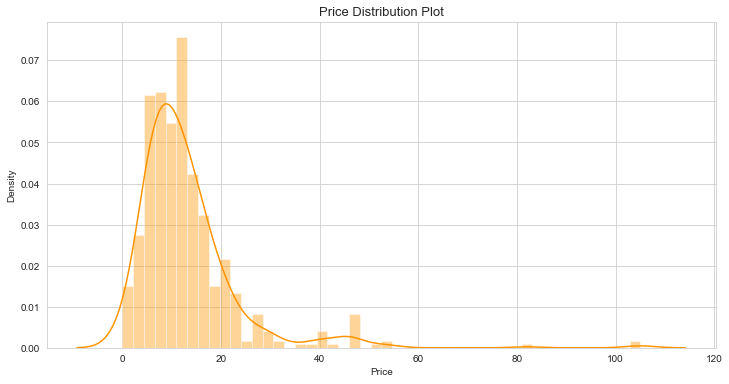

In [9]:
plt.figure(figsize=(12, 6))
sns.distplot(df['Price'], color="#ff9400")
plt.title('Price Distribution Plot', fontsize=13)
plt.show()

The distribution plot for the reviews of the books:

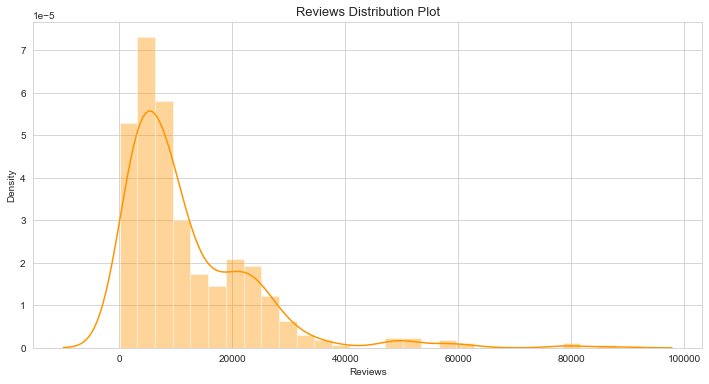

In [10]:
plt.figure(figsize=(12, 6))
sns.distplot(df['Reviews'], color="#ff9400")
plt.title('Reviews Distribution Plot', fontsize=13)
plt.show()

As we can see, the distribution is a right skewed. Let's see the user rating distribution plot across all the books:

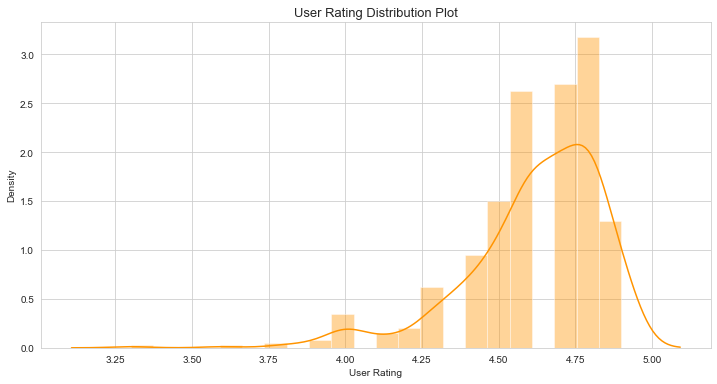

In [11]:
plt.figure(figsize=(12, 6))
sns.distplot(df['User Rating'], color="#ff9400")
plt.title('User Rating Distribution Plot', fontsize=13)
plt.show()

According to the distribution of Price and Reviews which both are right skewed. Let's plot the correlation between them.

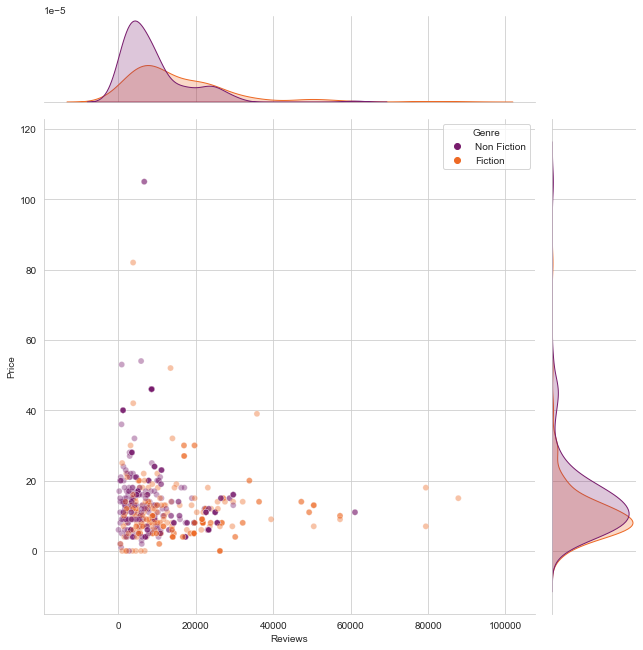

In [12]:
sns.jointplot(y=df['Price'], x=df['Reviews'], hue=df['Genre'], alpha=0.4, palette='inferno', height=9)
plt.show()

As we can see from the plot above, there are some points are outliers. Inorder to ignore those outliers we can find the acceptable range of our data using Interquartile Range (IQR) method. Therefore, we are able to focus the reviews with in the calculated range only.

In [13]:
IQR = df['Reviews'].quantile(0.75) - df['Reviews'].quantile(0.25)

upper_limit = df['Reviews'].quantile(0.75) + IQR * 1.5
lower_limit = df['Reviews'].quantile(0.75) - IQR * 1.5 

ex_lower_limit = df['Reviews'].quantile(0.75) - IQR * 3
ex_upper_limit = df['Reviews'].quantile(0.75) + IQR * 3

print(f"IQR: {IQR}")
print(f"Outlier's range:\t {[lower_limit, upper_limit]}")
print(f"Extreme Outlier's range: {[ex_lower_limit, ex_upper_limit]}") 

IQR: 13195.25
Outlier's range:	 [-2539.625, 37046.125]
Extreme Outlier's range: [-22332.5, 56839.0]


As you can see, the lower limits are negative values, it does not make any senses that the number of reviews is less than zero. Hence, we can ignore the lower limits and draw the upper limit lines to seperate the outliers:

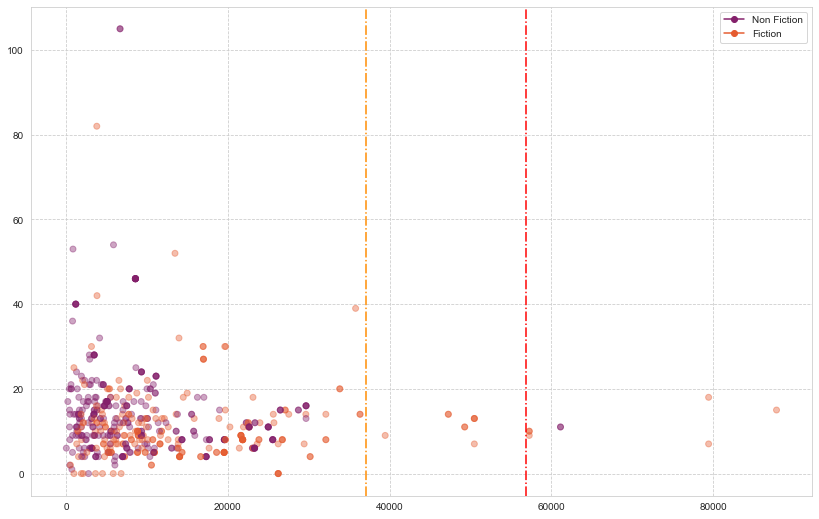

In [14]:
limit_lines = [Line2D([0], [0], marker='o', color='#84206b'),
                Line2D([0], [0], marker='o', color='#e55c30')]

colors = {'Non Fiction':'#84206b', 'Fiction':'#e55c30'}
fig, ax = plt.subplots(figsize=(14, 9))

ax.scatter(x=df['Reviews'], y=df['Price'], c=df['Genre'].apply(lambda x: colors[x]), alpha=0.4)
ax.axvline(x=upper_limit, color='darkorange', linestyle='-.')
ax.axvline(x=ex_upper_limit, color='red', linestyle='-.')
ax.grid(True, linestyle='--')
ax.legend(limit_lines, ['Non Fiction', 'Fiction'])
plt.show()

In the angle of machine learning, outliers are noise data which affect an accuracy of the machine learning directly. Finally, let's take a look at the correlation between those features:

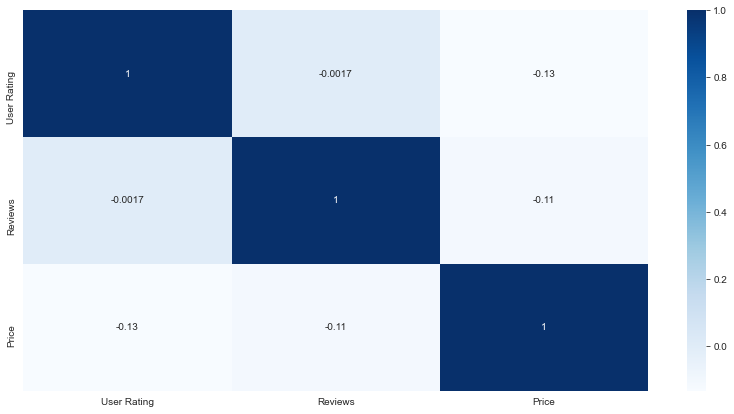

In [15]:
plt.figure(figsize=(14, 7))
sns.heatmap(df[['User Rating', 'Reviews', 'Price']].corr(), cmap='Blues', annot=True)
plt.show()

For another perspective, let's take a look at the 10 most famous authors from both the Fiction and Non Fiction genres in the top 50 list of Bestsellers from 
2009-2019.

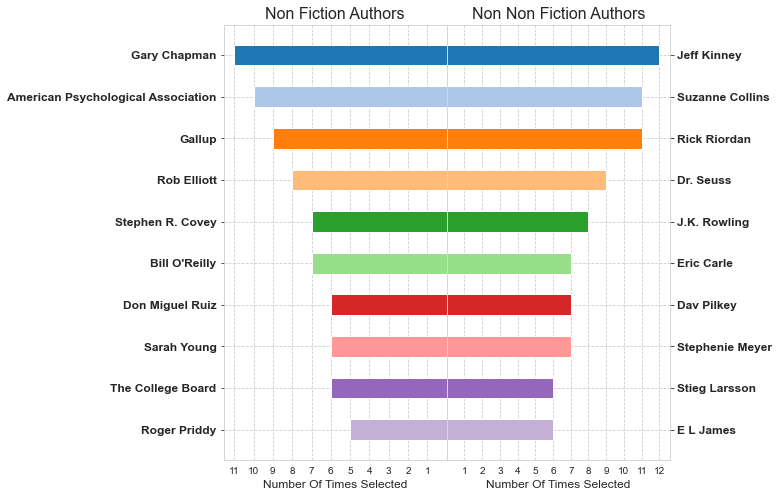

In [16]:
data = {
    "Fiction": df.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending=False).iloc[:10],
    "Non Fiction": df.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending=False).iloc[:10]
}


color = sns.color_palette('tab20')

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
plt.subplots_adjust(wspace=0)

for i, genre in enumerate(data):
    genre_df = data.get(genre)

    if i == 0:
        axes[i].invert_xaxis()
        axes[i].invert_yaxis()
        axes[i].yaxis.tick_left()
        axes[i].grid(True, linestyle='--')
        axes[i].set_xticks(range(1, int(genre_df.values.max()) + 1))
    else:
        axes[i].set_xticks(range(1, int(genre_df.values.max()) + 1))
        axes[i].invert_yaxis()
        axes[i].yaxis.tick_right()
        axes[i].grid(True, linestyle='--')

    axes[i].barh(y=genre_df.index, width=genre_df.values, height=0.5, tick_label=genre_df.index, color=color)
    axes[i].set_yticklabels(genre_df.index, fontweight='semibold', fontsize=12)
    axes[i].set_title(f'Non {genre} Authors', fontdict={'size' : 16})
    axes[i].set_xlabel('Number Of Times Selected', fontsize=12)

plt.show()

We can see that there are slightly different between the number of times selected as bestsellers among the top authors between Fiction and Non Fiction genres. Therefore, we can plot the number of sales between Fiction and Non Fiction genres in each year:

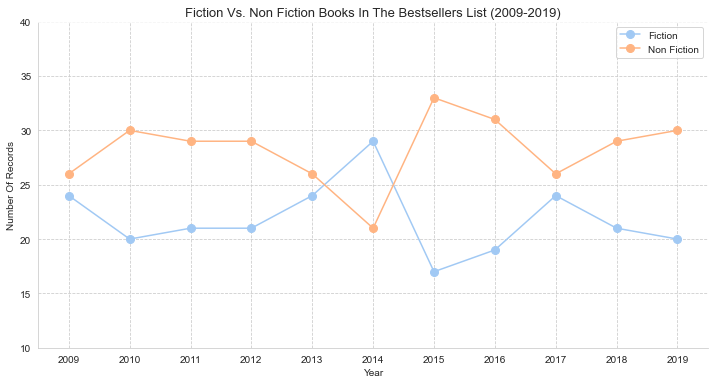

In [17]:
books = df.groupby(['Year', 'Genre']).count().unstack()['Name']

fig, axes=plt.subplots(1, 1, figsize=(12, 6))
sns.set_style('white')
axes.grid(True, linestyle='--')
axes.plot(books, markersize=8, marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Records')
axes.set_xticks(books.index)
axes.set_ylim(10, 40)
axes.spines['right'].set_color(None)
axes.spines['top'].set_color(None)
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)', fontdict={'size' : 13})

plt.show()

According to the plot above, the number of non-fiction books that has been selected is greater than the other one in almost all years except 2014. In order to conclude the dataset the top 20 authors based on their number of appearances to find out their:
- Number of Books
- Average User Rating
- Average Price Of The Books
- Total Reviews

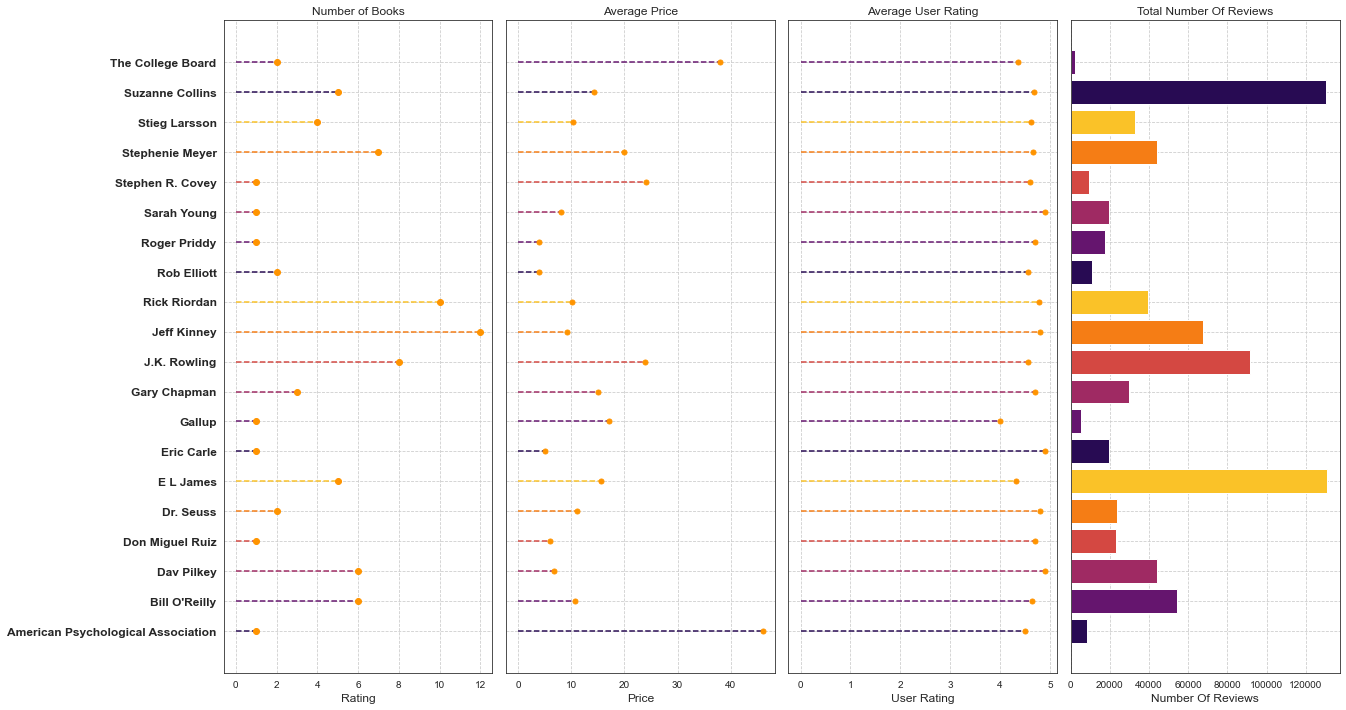

In [18]:
c0 = sns.color_palette('inferno')

top_20_authors = data['Fiction'].append(data['Non Fiction'])
non_dup_df = df.drop_duplicates(subset=['Name'])
author_df = non_dup_df[non_dup_df['Author'].isin(top_20_authors.index)]
groupby_df = author_df[['Author', 'Name', 'Price', 'User Rating', 'Reviews']].groupby('Author')

book_counts = groupby_df.count().unstack()['Name'].sort_index()
price_averages = groupby_df.mean().unstack()['Price'].sort_index()
rating_averages = groupby_df.mean().unstack()['User Rating'].sort_index()
review_sums = groupby_df.sum().unstack()['Reviews'].sort_index()

fig, ax = plt.subplots(1, 4, figsize=(20, 12), sharey=True)
plt.subplots_adjust(wspace=0.05)


ax[0].hlines(xmin=0, xmax=book_counts.values, y=book_counts.index, linestyle='--', color=c0)
ax[0].plot(book_counts.values, book_counts.index, marker='o', markersize=6, markerfacecolor='#ff9400', markeredgecolor='#ff9400', linestyle="None")
ax[0].set_xlabel('Rating', fontsize=12)
ax[0].set_title('Number of Books', fontsize=12)
ax[0].set_yticklabels(book_counts.index, fontweight='bold', fontsize=12)
ax[0].grid(True, linestyle='--')

ax[1].hlines(xmin=0, xmax=price_averages.values, y=price_averages.index, linestyle='--', color=c0)
ax[1].plot(price_averages.values, price_averages.index, 'o', markersize=5, markerfacecolor='#ff9400', markeredgecolor='#ff9400', linestyle="None")
ax[1].set_xlabel('Price', fontsize=12)
ax[1].set_title('Average Price', fontsize=12)
ax[1].set_yticklabels(price_averages.index, fontweight='bold', fontsize=12)
ax[1].grid(True, linestyle='--')

ax[2].hlines(xmin=0, xmax=rating_averages.values, y=rating_averages.index, linestyle='--', color=c0)
ax[2].plot(rating_averages.values, rating_averages.index, 'o', markersize=5, markerfacecolor='#ff9400', markeredgecolor='#ff9400', linestyle="None")
ax[2].set_xlabel('User Rating', fontsize=12)
ax[2].set_title('Average User Rating', fontsize=12)
ax[2].set_yticklabels(rating_averages.index, fontweight='bold', fontsize=12)
ax[2].grid(True, linestyle='--')

ax[3].barh(y=review_sums.index, width=review_sums.values, color=c0)
ax[3].set_xlabel('Number Of Reviews', fontsize=12)
ax[3].set_title('Total Number Of Reviews', fontsize=12)
ax[3].grid(True, linestyle='--')

plt.show()

The final plot shows that Jeff Kinney wrote largest amount of bestsellers books which is 12 book, at the same time, his books got quite high user rating which is 4.8 and the average book prices is under the overall average across other books in the dataset. Another fact is the 2 most expensive books from American Psychological Association and The College Board, have really less number of reviews even though user ratings are high which probably means that regardless their less sales (assumed that number of reviews are posted by user already bought the books), they still are the top 50 bestsellers. Thank you :)